In [ ]:
pip install -U fortran-magic


In [ ]:
import py_compile

In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
li = [10, 'twenty', 30, 40, 50, "sixty"]
li

[10, 'twenty', 30, 40, 50, 'sixty']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 10
second: twenty


In [ ]:
third = li[2]
fourth = li[3]
print("third:", third)
print("fourth:", fourth)

third: 30
fourth: 40


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
last = li[-1]
penultimate = li[-2]
antepenultimate = li[-3]
print("last:", last)
print("second to last:", penultimate)
print("third to last:", antepenultimate)

last: sixty
second to last: 50
third to last: 40


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
sublist1 = li[2:5]
sublist1

[30, 40, 50]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
first_two = li[:2]
first_two

[10, 'twenty']

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
after_two = li[3:]
after_two

[40, 50, 'sixty']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
li = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h','i','j']
li[2:6:2]

['c', 'e']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
li[::-1]

['j', 'i', 'h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
li = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
print("Before:", li)
li.append('i')
print("After:", li)

Before: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
After: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [ ]:
li = [1, 2, 3, 4, 5]
[x ** 2 for x in li]

[1, 4, 9, 16, 25]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [ ]:
players = {'Diego': 'Maradona', 'Lionel': 'Messi', 'Cristiano': 'Ronaldo'}
players

{'Cristiano': 'Ronaldo', 'Diego': 'Maradona', 'Lionel': 'Messi'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [ ]:
players ['Luis'] = 'Suárez'
players

{'Cristiano': 'Ronaldo',
 'Diego': 'Maradona',
 'Lionel': 'Messi',
 'Luis': 'Suárez'}

In [ ]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [ ]:
del players['Diego']
players

{'Cristiano': 'Ronaldo', 'Lionel': 'Messi', 'Luis': 'Suárez'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
a = [[7, 2, 0],
     [1, 2, 3],
     [5, 6, 8],
     [2, 1, 2],
     [3, 3, 1]]

b = [[5, 2, 3, 4],
     [1, 1, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 42 µs, sys: 2 µs, total: 44 µs
Wall time: 49.8 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [ ]:
%%time

matmul(a, b)

CPU times: user 49 µs, sys: 0 ns, total: 49 µs
Wall time: 55.8 µs


[[37, 16, 29, 38],
 [7, 4, 11, 14],
 [31, 16, 39, 50],
 [11, 5, 10, 13],
 [18, 9, 21, 27]]

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.1260947957608506, 0.08347799668390032, 0.2121942035082528],
 [0.350303787294197, 0.5545655327455997, 0.0933939641333793]]

In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 10.9 s, sys: 42.9 ms, total: 11 s
Wall time: 11 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 12.1 ms, sys: 899 µs, total: 13 ms
Wall time: 19.7 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 229 µs, total: 229 µs
Wall time: 237 µs


333328333350000.0

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data1 = np.array([5, 4, 3, 2, 1, 4])
data1

array([5, 4, 3, 2, 1, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
data1 * data1

array([25, 16,  9,  4,  1, 16])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 867 µs, sys: 930 µs, total: 1.8 ms
Wall time: 1.94 ms


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 2.36 ms, sys: 5.04 ms, total: 7.39 ms
Wall time: 11.7 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 218 µs, sys: 0 ns, total: 218 µs
Wall time: 227 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [ ]:
three_by_two = data1.reshape(3, 2)
three_by_two

array([[5, 4],
       [3, 2],
       [1, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [ ]:
array = np.array([10, 20, 30, 40, 50, 60, 70, 80], dtype='int16').reshape(4, 2)
print("Array:\n", array, sep='')
print("===========")
print("DType:", array.dtype)
print("Shape:", array.shape)
print("Strides:", array.strides)
print("Data:", array.data.tobytes())

Array:
[[10 20]
 [30 40]
 [50 60]
 [70 80]]
DType: int16
Shape: (4, 2)
Strides: (4, 2)
Data: b'\n\x00\x14\x00\x1e\x00(\x002\x00<\x00F\x00P\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
data2 = np.arange(10).reshape(2, 5)
data2

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
data2 * data2

array([[ 0,  1,  4,  9, 16],
       [25, 36, 49, 64, 81]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

In [ ]:
np.sqrt(data2)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
(data2 % 2) == 0

array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [ ]:
((data2 % 3) == 0) & ((data2 % 7) == 0)

array([[ True, False, False, False, False],
       [False, False, False, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [ ]:
data2.T @ data2

array([[25, 30, 35, 40, 45],
       [30, 37, 44, 51, 58],
       [35, 44, 53, 62, 71],
       [40, 51, 62, 73, 84],
       [45, 58, 71, 84, 97]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
arcsines = np.arcsin(np.linspace(0, 3.14, 10))
arccosines = np.arccos(np.linspace(0, 3.14, 10))
arcsines

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arcsin
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arccos
  


array([0.        , 0.35638523, 0.77229049,        nan,        nan,
              nan,        nan,        nan,        nan,        nan])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
arcsines[0]

0.0

In [ ]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [ ]:
arcsines[:4]  # First four elements  

array([0.        , 0.35638523, 0.77229049,        nan])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
arcsines[2:]  # Elements from 2 on.

array([0.77229049,        nan,        nan,        nan,        nan,
              nan,        nan,        nan])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

In [ ]:
arcsines[::2]  

array([0.        , 0.77229049,        nan,        nan,        nan])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


In [ ]:
print("arcsines:\n", arcsines)
print("arcsines > 0.5:\n", arcsines > 0.5)
print("arcsines[arcsines > 0.5]:\n", arcsines[arcsines > 0.5])

arcsines:
 [0.         0.35638523 0.77229049        nan        nan        nan
        nan        nan        nan        nan]
arcsines > 0.5:
 [False False  True False False False False False False False]
arcsines[arcsines > 0.5]:
 [0.77229049]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

In [ ]:
print(arcsines)
sines[[0, 2, 5]]

[0.         0.35638523 0.77229049        nan        nan        nan
        nan        nan        nan        nan]


array([ 0.        ,  0.83849669, -5.70077307])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
unsorted_data1 = np.array([0, 4, 22, 1, 2, -15, -2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
sort_indices1 = np.argsort(unsorted_data1)
sort_indices1

array([5, 6, 0, 3, 4, 1, 2])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
unsorted_data1[sort_indices1]

array([-15,  -2,   0,   1,   2,   4,  22])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
market_caps1 = np.array([1, 2, 20, 35, 7])  # Presumably in dollars?
assets1 = np.array(['J', 'K', 'L', 'M', 'N'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
sort_by_mcap1 = np.argsort(market_caps1)
assets[sort_by_mcap1]

array(['A', 'B', 'E', 'C', 'D'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data2 = np.arange(16).reshape(4, 4)
data2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:3, :3]  # First three rows and first three columns.

array([[ 0,  1,  2],
       [ 5,  6,  7],
       [10, 11, 12]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data2[:3, [0, -1]]  # First tree rows, first and last columns.

array([[ 0,  3],
       [ 4,  7],
       [ 8, 11]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [ ]:
data2[(data2[:, 0] % 3) == 0]  # Rows where the first column is divisible by three.

array([[ 0,  1,  2,  3],
       [12, 13, 14, 15]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

In [ ]:
values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

array([0.14285714, 0.25      , 0.33333333, 0.16666667, 0.125     ])

In [ ]:
variance(np.random.standard_normal(1000))

0.9769484243396419

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row = np.array([6, 5, 3, 23])
column = np.array([[0], [1], [2]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[ 6  5  3 23]
Column:
[[0]
 [1]
 [2]]


In [ ]:
row ** column

array([[  1,   1,   1,   1],
       [  6,   5,   3,  23],
       [ 36,  25,   9, 529]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Mean:
14.5
Data - Mean:
[-14.5 -13.5 -12.5 -11.5 -10.5  -9.5  -8.5  -7.5  -6.5  -5.5  -4.5  -3.5
  -2.5  -1.5  -0.5   0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5
   9.5  10.5  11.5  12.5  13.5  14.5]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
s = pd.Series(index=[1, 2, 3, 4, 5], data=['a', 'b', 'c', 'd', 'e'])
s

1    a
2    b
3    c
4    d
5    e
dtype: object

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Int64Index([1, 2, 3, 4, 5], dtype='int64')
The values are: ['a' 'b' 'c' 'd' 'e']


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
s.iloc[1]

'b'

In [ ]:
# ... or by label.
s.loc[3]

'c'

In [ ]:
s.loc[1]

'a'

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
s.iloc[:3]

1    a
2    b
3    c
dtype: object

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

1    a
2    b
3    c
4    d
5    e
dtype: object

In [ ]:
s.loc[:3]

1    a
2    b
3    c
dtype: object

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
s.iloc[[0, -1]]

1    a
5    e
dtype: object

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
other_s = pd.Series({'a': 33, 'c': 6, 'd': 24, 'z': 23})
other_s

a    33
c     6
d    24
z    23
dtype: int64

In [ ]:
s + other_s

1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
a    NaN
c    NaN
d    NaN
z    NaN
dtype: object

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
(s + other_s).fillna(0.0)

1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
a    0.0
c    0.0
d    0.0
z    0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('/content/pydata-toolbox/notebooks/AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

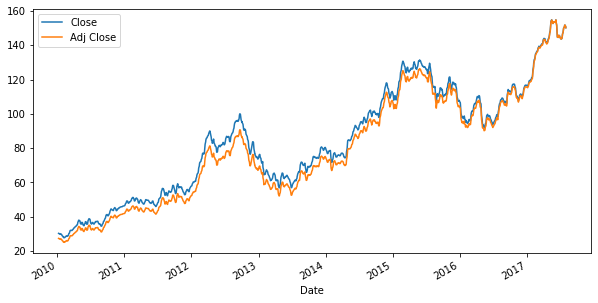

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

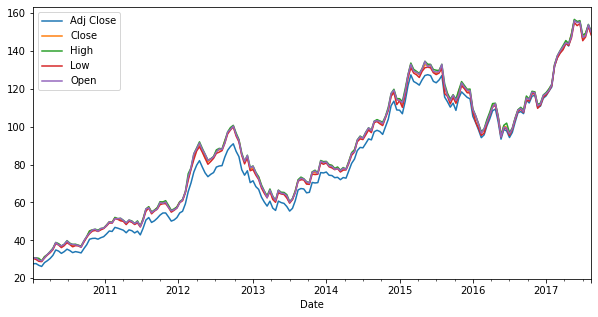

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

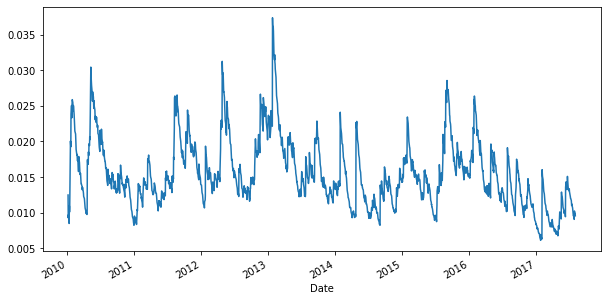

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from pydata_toolbox.demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

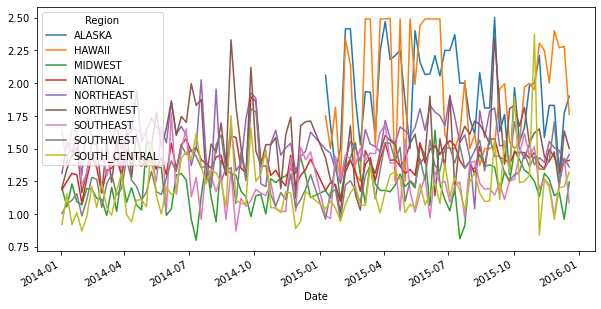

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

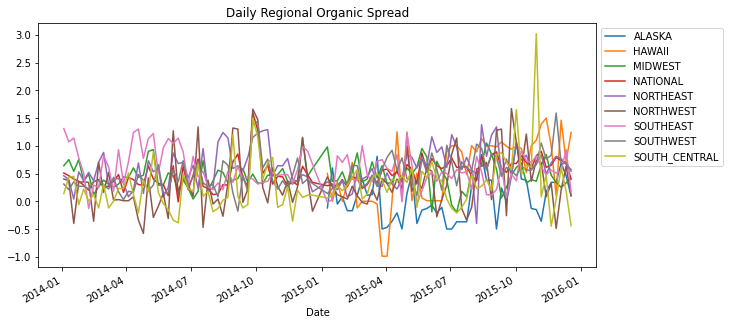

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


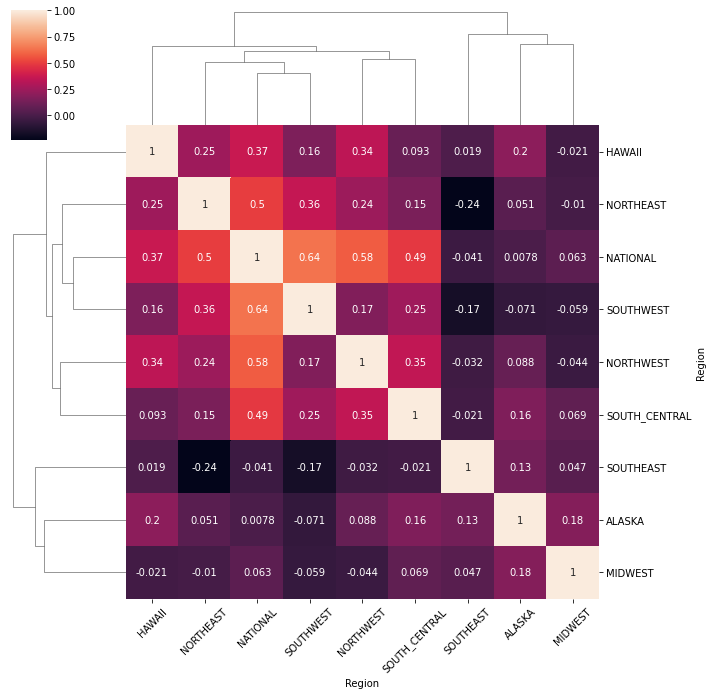

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!

## "Real World" Data

In [ ]:
aapl = pd.read_csv('/content/pydata-toolbox/notebooks/Suscriptores_television.csv', parse_dates=['ANNO_REPORTADO'], index_col='ANNO_REPORTADO')
aapl.head()

,MES_DEL_ANNO,NIT,NOMBRE,ID_MUNICIPIO,MUNICIPIO,TOTAL_ASOCIADOS,INGRESOS_BRUTOS,INGRESO_PAUTA_PUBLICITARIA,VALOR_APORTE_MENSUAL,TARIFA_POR_INSTALACION,NUM_ENVIO
ANNO_REPORTADO,,,,,,,,,,,
2020-01-01,1,900137741,ASOCIACION CABLE CIMA TV,11001,"BOGOTÁ, D.C.",353,10590000,0,30000,30000,219823
2020-01-01,1,811009220,ASOCIACION ANTENA PARABOLICA CIUDAD BOLIVAR AP...,5101,CIUDAD BOLÍVAR,2198,62139343,125000,27000,43400,219042
2020-01-01,1,900000135,ASOC.USUARIOS TV SATELITE MIRAFLORES,15455,MIRAFLORES,820,13120000,0,16000,70000,217880
2020-01-01,1,900028671,ASOCIACION DE TELEVIDENTES DE GUACHETA,25317,GUACHETÁ,1068,47098000,0,18000,180000,220277
2020-01-01,1,900319058,ASOCIACION COMUNITARIA PARABOLICA GRANADA,5313,GRANADA,570,9788000,0,16000,160000,220027


In [ ]:
aapl.iloc[:10, :10]

,MES_DEL_ANNO,NIT,NOMBRE,ID_MUNICIPIO,MUNICIPIO,TOTAL_ASOCIADOS,INGRESOS_BRUTOS,INGRESO_PAUTA_PUBLICITARIA,VALOR_APORTE_MENSUAL,TARIFA_POR_INSTALACION
ANNO_REPORTADO,,,,,,,,,,
2020-01-01,1,900137741,ASOCIACION CABLE CIMA TV,11001,"BOGOTÁ, D.C.",353,10590000,0,30000,30000
2020-01-01,1,811009220,ASOCIACION ANTENA PARABOLICA CIUDAD BOLIVAR AP...,5101,CIUDAD BOLÍVAR,2198,62139343,125000,27000,43400
2020-01-01,1,900000135,ASOC.USUARIOS TV SATELITE MIRAFLORES,15455,MIRAFLORES,820,13120000,0,16000,70000
2020-01-01,1,900028671,ASOCIACION DE TELEVIDENTES DE GUACHETA,25317,GUACHETÁ,1068,47098000,0,18000,180000
2020-01-01,1,900319058,ASOCIACION COMUNITARIA PARABOLICA GRANADA,5313,GRANADA,570,9788000,0,16000,160000
2020-01-01,1,832005664,ASOCIACION DE COPROPIETARIOS DE LA ANTENA PARA...,25295,GACHANCIPÁ,1000,26066000,0,17000,80000
2020-01-01,1,811015974,ASOCIACION CIVICA LA SIERRA ACISIERRA,5585,PUERTO NARE,564,10699600,0,17000,30000
2020-01-01,1,800240299,ASOCIACION POR RECREACION Y CULTURA DE ZIPAQUI...,25899,ZIPAQUIRÁ,797,16543000,0,19900,70000
2020-01-01,1,900032684,ASOCIACION DE TELEVIDENTES DE SAN MIGUEL ASOTELMI,86757,SAN MIGUEL,224,3360000,0,15000,30000


In [ ]:
aapl.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-01-01'), ['NOMBRE', 'ID_MUNICIPIO']]

,NOMBRE,ID_MUNICIPIO
ANNO_REPORTADO,,
2020-01-01,ASOCIACION CABLE CIMA TV,11001
2020-01-01,ASOCIACION ANTENA PARABOLICA CIUDAD BOLIVAR AP...,5101
2020-01-01,ASOC.USUARIOS TV SATELITE MIRAFLORES,15455
2020-01-01,ASOCIACION DE TELEVIDENTES DE GUACHETA,25317
2020-01-01,ASOCIACION COMUNITARIA PARABOLICA GRANADA,5313
...,...,...
2020-01-01,ASOCIACION DE TELECOMUNICACIONES DE SIMITI,13744
2020-01-01,CORPORACION DE TELEVISION SAN MARTIN DE LOBA,13667
2020-01-01,ASOCIACION JENESANO TELEVISION,15367


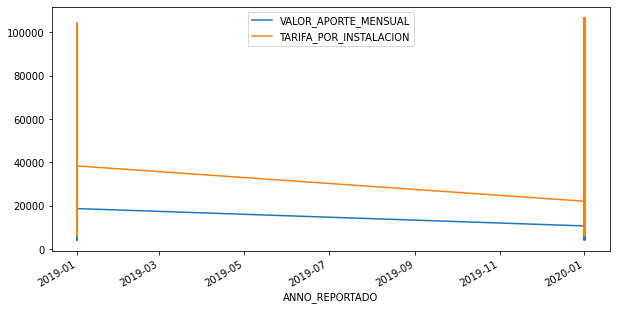

In [ ]:
aapl.rolling(5)[['VALOR_APORTE_MENSUAL', 'TARIFA_POR_INSTALACION']].mean().plot();

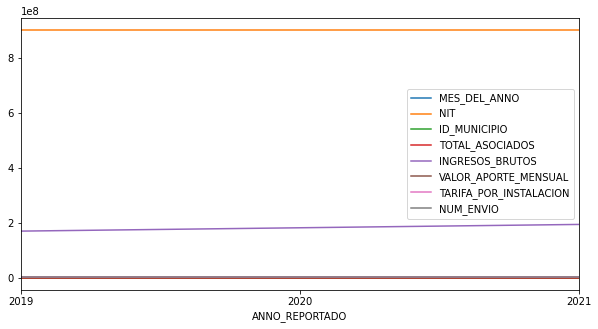

In [ ]:
aapl.drop('INGRESO_PAUTA_PUBLICITARIA', axis=1).resample('2A').max().plot();

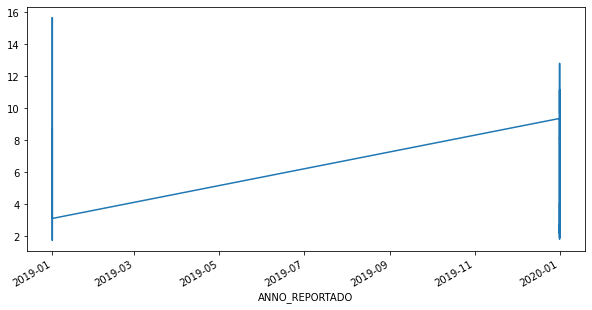

In [ ]:
aapl['INGRESOS_BRUTOS'].pct_change().ewm(span=30).std().plot();